In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, lognorm
import math

In [ ]:
bwages_df = pd.read_csv('sample_data/Bwages.csv')
print(bwages_df.head())

        wage
0   7.780208
1   4.818505
2  10.563645
3   7.042429
4   7.887521


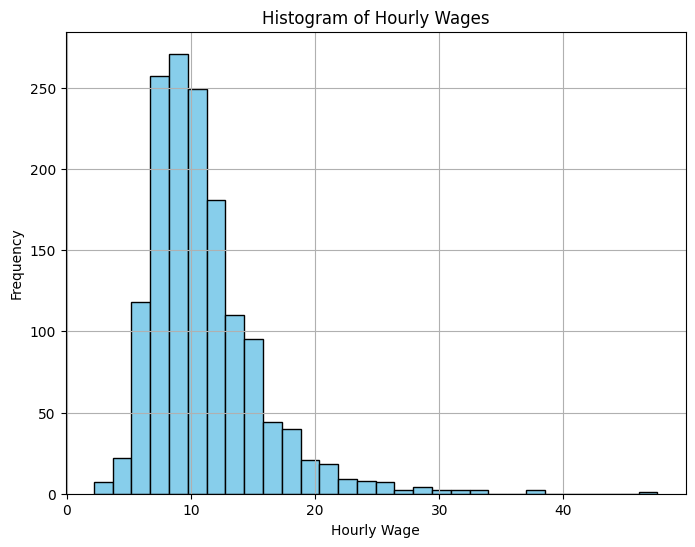

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(bwages_df['wage'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Hourly Wages')
plt.xlabel('Hourly Wage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
mean_wage = bwages_df['wage'].mean()
std_wage = bwages_df['wage'].std()

In [ ]:
plt.figure(figsize=(8, 6))
norm_qq = norm.ppf(np.linspace(0.01, 0.99, len(bwages_df)), loc=mean_wage, scale=std_wage)
sample_quantiles = np.quantile(bwages_df['wage'], np.linspace(0.01, 0.99, len(bwages_df)))

<Figure size 800x600 with 0 Axes>

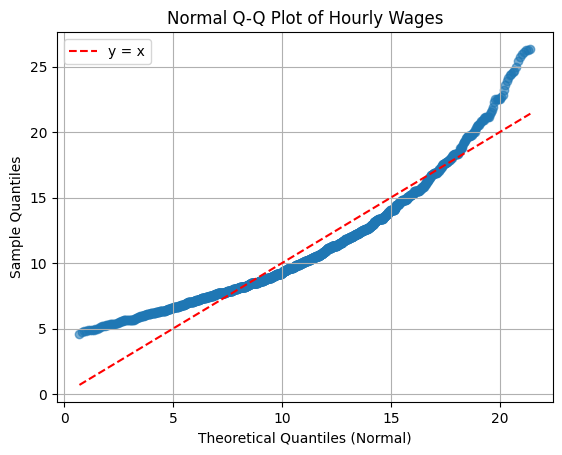

In [ ]:
plt.scatter(norm_qq, sample_quantiles, alpha=0.6)
plt.plot([min(norm_qq), max(norm_qq)], [min(norm_qq), max(norm_qq)], 'r--', label='y = x')
plt.title('Normal Q-Q Plot of Hourly Wages')
plt.xlabel('Theoretical Quantiles (Normal)')
plt.ylabel('Sample Quantiles')
plt.legend()
plt.grid(True)
plt.show()

The normal Q-Q plot shows deviations from normality, especially in the tails. Therefore, it is not a good fit for the data.

In [ ]:
log_wages = np.log(bwages_df['wage'])
mu = log_wages.mean()
sigma = log_wages.std()

In [ ]:
quantiles = np.linspace(0.01, 0.99, len(bwages_df))
theoretical_quantiles = lognorm.ppf(quantiles, sigma, scale=math.exp(mu))
sample_quantiles = np.quantile(bwages_df['wage'], quantiles)

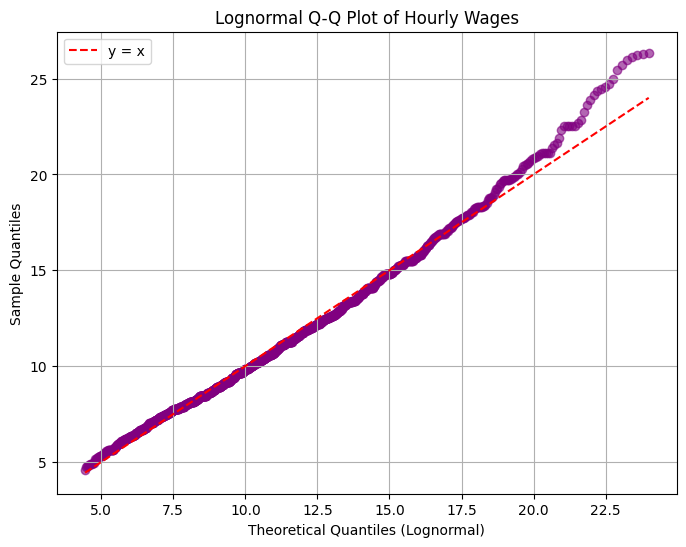

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(theoretical_quantiles, sample_quantiles, alpha=0.6, color='purple')
plt.plot([min(theoretical_quantiles), max(theoretical_quantiles)],
         [min(theoretical_quantiles), max(theoretical_quantiles)], 'r--', label='y = x')
plt.title('Lognormal Q-Q Plot of Hourly Wages')
plt.xlabel('Theoretical Quantiles (Lognormal)')
plt.ylabel('Sample Quantiles')
plt.legend()
plt.grid(True)
plt.show()

The lognormal Q-Q plot likely fits better than the normal plot. But there are still deviations, especially at the upper tail end